In [17]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
detailed_season_df = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv")
detailed_season_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


### Calculation of Advanced Metrics per Game

In [3]:
advanved_detailed_season_df = detailed_season_df.copy()

# Drop DayNum and NumOT as irrelevant
advanved_detailed_season_df = advanved_detailed_season_df.drop(columns = ["DayNum", "NumOT"])

# Effective Field Goal Percentage
# Winning Team: WFGM + (0.5 * WFGM3) / WFGA
advanved_detailed_season_df['WEFGP'] = (advanved_detailed_season_df['WFGM'] + (0.5 * advanved_detailed_season_df['WFGM3'])) / advanved_detailed_season_df['WFGA']
# Losing Team: LFGM + (0.5 * LFGM3) / LFGA
advanved_detailed_season_df['LEFGP'] = (advanved_detailed_season_df['LFGM'] + (0.5 * advanved_detailed_season_df['LFGM3'])) / advanved_detailed_season_df['LFGA']

#Turnover Percentage
# Winning Team: WTO / (WFGA + (0.44 * WFTA) + WTO)
advanved_detailed_season_df['WTP'] = advanved_detailed_season_df['WTO'] / (advanved_detailed_season_df['WFGA'] + (0.44 * advanved_detailed_season_df['WFTA']) + advanved_detailed_season_df['WTO']) 
# Losing Team: LTO / (LFGA + (0.44 * LFTA) + LTO)
advanved_detailed_season_df['LTP'] = advanved_detailed_season_df['LTO'] / (advanved_detailed_season_df['LFGA'] + (0.44 * advanved_detailed_season_df['LFTA']) + advanved_detailed_season_df['LTO']) 

# Offensive Rebound Percentage
# Winning Team: WOR / WOR + LDR
advanved_detailed_season_df['WORP'] = advanved_detailed_season_df['WOR'] / (advanved_detailed_season_df['WOR'] + advanved_detailed_season_df['LDR'])
#Losing Team: LOR / LOR + WDR
advanved_detailed_season_df['LORP'] = advanved_detailed_season_df['LOR'] / (advanved_detailed_season_df['LOR'] + advanved_detailed_season_df['WDR'])

# Free Throw Rate
# Winning Team: WFTM / WFGA
advanved_detailed_season_df['WFTR'] = advanved_detailed_season_df['WFTM'] / advanved_detailed_season_df['WFGA'] 
# Losing Team: LFTM / LFGA
advanved_detailed_season_df['LFTR'] = advanved_detailed_season_df['LFTM'] / advanved_detailed_season_df['LFGA'] 

advanved_detailed_season_df.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,...,LBlk,LPF,WEFGP,LEFGP,WTP,LTP,WORP,LORP,WFTR,LFTR
0,2003,1104,68,1328,62,N,27,58,3,14,...,2,20,0.491379,0.433962,0.258659,0.223104,0.388889,0.294118,0.189655,0.301887
1,2003,1272,70,1393,63,N,26,62,8,20,...,6,16,0.483871,0.402985,0.155950,0.136674,0.375000,0.416667,0.161290,0.134328
2,2003,1266,73,1437,61,N,24,58,8,18,...,5,23,0.482759,0.321918,0.123824,0.126156,0.435897,0.543860,0.293103,0.191781
3,2003,1296,56,1457,50,N,18,38,3,9,...,3,23,0.513158,0.428571,0.188561,0.254692,0.230769,0.472222,0.447368,0.163265
4,2003,1400,77,1208,71,N,30,61,6,14,...,1,14,0.540984,0.435484,0.173439,0.119218,0.531250,0.488372,0.180328,0.274194


### Calculation of Advanced Metrics by Season

In [4]:
# Determining which columns pertain to winners and losers
W_cols = []
L_cols = []

for c in advanved_detailed_season_df.columns:
    if c[0] == "W": #Column pertains to winner
        W_cols.append(c)
    elif c[0] == "L": # Column pertains to loser
        L_cols.append(c)
    else: # Column applies to both
        W_cols.append(c)
        L_cols.append(c)

In [5]:
winners_season_totals_df = advanved_detailed_season_df[W_cols].groupby(["Season","WTeamID"]).sum().reset_index()
winners_season_totals_df.head()


,Season,WTeamID,WScore,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,WEFGP,WTP,WORP,WFTR
0,2003,1102,825,271,480,120,259,163,249,46,232,203,133,88,34,193,8.305950,2.184427,2.066250,4.270526
1,2003,1103,1141,390,720,71,187,290,402,122,279,230,163,95,24,266,7.703849,2.017537,4.140626,5.224313
2,2003,1104,1270,439,992,120,354,272,383,230,449,238,222,123,71,280,8.602946,2.724733,6.239836,4.728497
3,2003,1105,556,179,433,64,157,134,180,102,181,111,126,79,14,136,3.418803,1.382465,2.682010,2.202557
4,2003,1106,888,322,700,76,207,168,270,166,364,169,230,122,49,239,6.729689,2.862692,4.926373,3.225302


In [6]:
losers_season_totals_df = advanved_detailed_season_df[L_cols].groupby(["Season","LTeamID"]).sum().reset_index()
losers_season_totals_df.head()


,Season,LTeamID,LScore,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LEFGP,LTP,LORP,LFTR
0,2003,1102,778,265,634,99,324,149,230,71,239,161,187,79,16,332,8.057458,3.222974,2.644341,3.889684
1,2003,1103,986,343,788,76,247,224,296,142,259,181,178,101,39,270,6.783384,2.297189,4.116043,4.036028
2,2003,1104,670,234,609,58,202,144,203,150,221,101,150,62,35,225,4.719024,1.958960,4.155320,2.659445
3,2003,1105,1310,455,1169,133,383,267,388,249,420,267,359,163,40,390,8.488761,4.020133,6.032299,4.443809
4,2003,1106,893,334,848,95,287,130,191,178,304,158,247,112,39,270,6.757827,3.121495,4.859077,2.367428


### Calculating Num Wins & Losses per Team by Year

In [7]:
# Read in data
compact_season_df = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MRegularSeasonCompactResults.csv")
# Filter to Season > 2003 (min year for deatailed daya)
compact_season_df = compact_season_df[compact_season_df["Season"] >= 2003].reset_index(drop=True)
compact_season_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,2003,10,1104,68,1328,62,N,0
1,2003,10,1272,70,1393,63,N,0
2,2003,11,1266,73,1437,61,N,0
3,2003,11,1296,56,1457,50,N,0
4,2003,11,1400,77,1208,71,N,0


In [8]:
# Group by Season and WTeamID, count rows, replace NA's w/ 0's for undefeated teams
wins_per_season_df = compact_season_df.groupby(["Season","WTeamID"])["DayNum"].count().reset_index().fillna(0)
wins_per_season_df.rename(columns = {"DayNum": "NumWins"}, inplace = True)

wins_per_season_df.head()

,Season,WTeamID,NumWins
0,2003,1102,12
1,2003,1103,13
2,2003,1104,17
3,2003,1105,7
4,2003,1106,13


In [9]:
# Group by Season and LTeamID, count rows, replace NA's w/ 0's for teams without win
losses_per_season_df = compact_season_df.groupby(["Season","LTeamID"])["DayNum"].count().reset_index().fillna(0)
losses_per_season_df.rename(columns = {"DayNum": "NumLosses"}, inplace = True)

losses_per_season_df.head()

,Season,LTeamID,NumLosses
0,2003,1102,16
1,2003,1103,14
2,2003,1104,11
3,2003,1105,19
4,2003,1106,15


### Computing Weighted avg. Advanced Metrics per Team by Season

In [10]:
combined_winners_df = wins_per_season_df.merge(winners_season_totals_df, on=["Season","WTeamID"])
combined_winners_df.head()

,Season,WTeamID,NumWins,WScore,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,...,WDR,WAst,WTO,WStl,WBlk,WPF,WEFGP,WTP,WORP,WFTR
0,2003,1102,12,825,271,480,120,259,163,249,...,232,203,133,88,34,193,8.305950,2.184427,2.066250,4.270526
1,2003,1103,13,1141,390,720,71,187,290,402,...,279,230,163,95,24,266,7.703849,2.017537,4.140626,5.224313
2,2003,1104,17,1270,439,992,120,354,272,383,...,449,238,222,123,71,280,8.602946,2.724733,6.239836,4.728497
3,2003,1105,7,556,179,433,64,157,134,180,...,181,111,126,79,14,136,3.418803,1.382465,2.682010,2.202557
4,2003,1106,13,888,322,700,76,207,168,270,...,364,169,230,122,49,239,6.729689,2.862692,4.926373,3.225302


In [11]:
combined_losers_df = losses_per_season_df.merge(losers_season_totals_df, on=["Season","LTeamID"])
combined_losers_df.head()

,Season,LTeamID,NumLosses,LScore,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,...,LDR,LAst,LTO,LStl,LBlk,LPF,LEFGP,LTP,LORP,LFTR
0,2003,1102,16,778,265,634,99,324,149,230,...,239,161,187,79,16,332,8.057458,3.222974,2.644341,3.889684
1,2003,1103,14,986,343,788,76,247,224,296,...,259,181,178,101,39,270,6.783384,2.297189,4.116043,4.036028
2,2003,1104,11,670,234,609,58,202,144,203,...,221,101,150,62,35,225,4.719024,1.958960,4.155320,2.659445
3,2003,1105,19,1310,455,1169,133,383,267,388,...,420,267,359,163,40,390,8.488761,4.020133,6.032299,4.443809
4,2003,1106,15,893,334,848,95,287,130,191,...,304,158,247,112,39,270,6.757827,3.121495,4.859077,2.367428


In [12]:
combined_season_df = combined_winners_df.merge(combined_losers_df, left_on=["Season", "WTeamID"], right_on=["Season", "LTeamID"])
combined_season_df.head()


,Season,WTeamID,NumWins,WScore,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,...,LDR,LAst,LTO,LStl,LBlk,LPF,LEFGP,LTP,LORP,LFTR
0,2003,1102,12,825,271,480,120,259,163,249,...,239,161,187,79,16,332,8.057458,3.222974,2.644341,3.889684
1,2003,1103,13,1141,390,720,71,187,290,402,...,259,181,178,101,39,270,6.783384,2.297189,4.116043,4.036028
2,2003,1104,17,1270,439,992,120,354,272,383,...,221,101,150,62,35,225,4.719024,1.958960,4.155320,2.659445
3,2003,1105,7,556,179,433,64,157,134,180,...,420,267,359,163,40,390,8.488761,4.020133,6.032299,4.443809
4,2003,1106,13,888,322,700,76,207,168,270,...,304,158,247,112,39,270,6.757827,3.121495,4.859077,2.367428


In [13]:
# Make sure both DataFrames have same number of columns
assert(len(combined_winners_df.columns) == len(combined_losers_df.columns))

# Create new DataFrame to store weighted results
weighted_season_df = pd.DataFrame()

# Iterate through features, 
for idx in range(len(combined_winners_df.columns)): 
    
    win_col_name = combined_winners_df.columns[idx]
    
    # Set new columnn name removing W/L prefix
    if win_col_name[0] == "W":
        new_col_name = "avg_" + win_col_name[1:]
    else:
        new_col_name =  win_col_name
        
    # Take weighted avg of stats from wins and losses
    weighted_season_df[new_col_name] = (combined_season_df[combined_winners_df.columns[idx]] + combined_season_df[combined_losers_df.columns[idx]]) / (combined_season_df["NumWins"] + combined_season_df["NumLosses"]) 


weighted_season_df.rename(columns = {"avg_TeamID": "TeamID"}, inplace = True)
weighted_season_df["Season"] = combined_season_df["Season"]
weighted_season_df["TeamID"] = combined_season_df["WTeamID"]
weighted_season_df["NumLosses"] = combined_season_df["NumLosses"]
weighted_season_df["NumWins"] = combined_season_df["NumWins"]
weighted_season_df["NumLosses"] = combined_season_df["NumLosses"]

weighted_season_df.head()


,Season,TeamID,NumWins,avg_Score,avg_FGM,avg_FGA,avg_FGM3,avg_FGA3,avg_FTM,avg_FTA,...,avg_Ast,avg_TO,avg_Stl,avg_Blk,avg_PF,avg_EFGP,avg_TP,avg_ORP,avg_FTR,NumLosses
0,2003,1102,12,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,...,13.000000,11.428571,5.964286,1.785714,18.750000,0.584407,0.193121,0.168235,0.291436,16
1,2003,1103,13,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,...,15.222222,12.629630,7.259259,2.333333,19.851852,0.536564,0.159805,0.305803,0.342976,14
2,2003,1104,17,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,...,12.107143,13.285714,6.607143,3.785714,18.035714,0.475785,0.167275,0.371256,0.263855,11
3,2003,1105,7,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,...,14.538462,18.653846,9.307692,2.076923,20.230769,0.457983,0.207792,0.335166,0.255629,19
4,2003,1106,13,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,...,11.678571,17.035714,8.357143,3.142857,18.178571,0.481697,0.213721,0.349480,0.199740,15


# Combo

In [14]:
compact_tournament_df = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv")
compact_tournament_df = compact_tournament_df[compact_tournament_df["Season"] >= 2003].reset_index(drop=True)
compact_tournament_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,2003,134,1421,92,1411,84,N,1
1,2003,136,1112,80,1436,51,N,0
2,2003,136,1113,84,1272,71,N,0
3,2003,136,1141,79,1166,73,N,0
4,2003,136,1143,76,1301,74,N,1
...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,N,0
1177,2021,148,1417,51,1276,49,N,0
1178,2021,152,1124,78,1222,59,N,0
1179,2021,152,1211,93,1417,90,N,1


In [18]:
winners = compact_tournament_df[["Season","WTeamID","LTeamID"]].merge(weighted_season_df, how="left", 
                                                            left_on=["Season","WTeamID"], 
                                                            right_on = ["Season","TeamID"])

losers = compact_tournament_df[["Season","WTeamID","LTeamID"]].merge(weighted_season_df, how="left", 
                                                            left_on=["Season","LTeamID"], 
                                                            right_on = ["Season","TeamID"])

(array([  2.,  16.,  58., 139., 270., 321., 233.,  97.,  26.,   6.]),
 array([-0.18728833, -0.14961809, -0.11194785, -0.0742776 , -0.03660736,
         0.00106289,  0.03873313,  0.07640337,  0.11407362,  0.15174386,
         0.1894141 ]),
 <BarContainer object of 10 artists>)

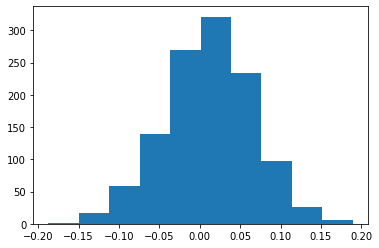

In [19]:
a = winners['avg_ORP'] - losers['avg_ORP']
plt.hist(a)

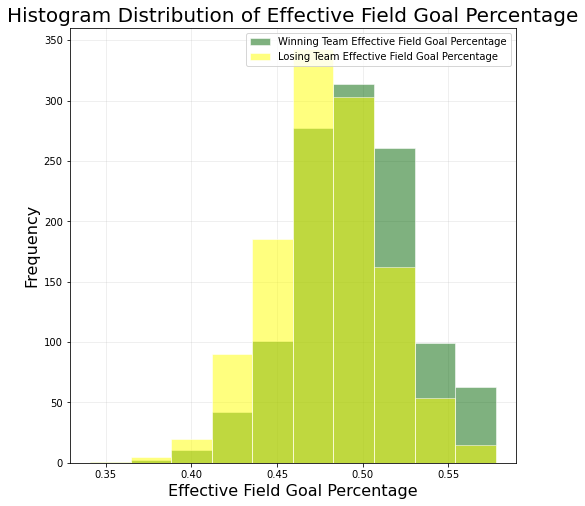

In [60]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(8,8))
winners.hist(column='avg_EFGP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Effective Field Goal Percentage")
losers.hist(column='avg_EFGP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Effective Field Goal Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Effective Field Goal Percentage", fontsize=20)
ax.set_xlabel("Effective Field Goal Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

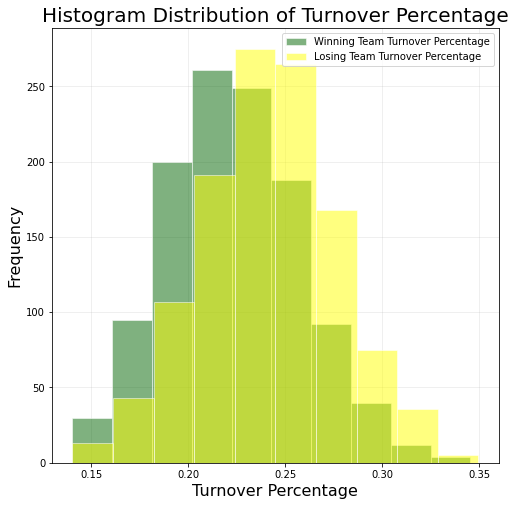

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
winners.hist(column='avg_TP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Turnover Percentage")
losers.hist(column='avg_TP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Turnover Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Turnover Percentage", fontsize=20)
ax.set_xlabel("Turnover Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

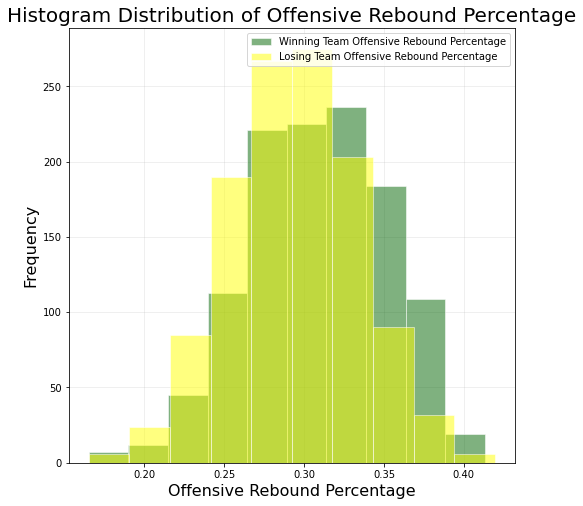

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
winners.hist(column='avg_ORP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Offensive Rebound Percentage")
losers.hist(column='avg_ORP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Offensive Rebound Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Offensive Rebound Percentage", fontsize=20)
ax.set_xlabel("Offensive Rebound Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()